In [1]:
import pandas as pd

In [2]:
s = pd.Series([1, 2, 3, 4], index=["one", "two", "three", "four"])
s

one      1
two      2
three    3
four     4
dtype: int64

In [3]:
s[0:3]

one      1
two      2
three    3
dtype: int64

In [4]:
s['one':'three']

one      1
two      2
three    3
dtype: int64

In [5]:
s[0:2]

one    1
two    2
dtype: int64

In [6]:
s[0:2] = 7
s

one      7
two      7
three    3
four     4
dtype: int64

In [7]:
s

one      7
two      7
three    3
four     4
dtype: int64

In [8]:
del s['three']
s

one     7
two     7
four    4
dtype: int64

In [9]:
import numpy as np

data = {"name":["Tri-brigade Fractall", "Altergeist Hextia", "Maxx C", "Accesscode Talker", "Bagooska", "Baronnes"],
        "category":["effect", "link", "effect", "link", "xyz", "synchro"],
        "level/rank/link":[4, 2, 2, 4, 4, 10],
        "attribute":["fire", "fire", "ground", "dark", "ground", "wind"],
        "type":["beast-warrior", "spellcaster", "insect", "cyberse", "fiend", "warrior"],
        "attack":[1900, 1500, 500, 2300, 2100, 3000],
        "defense":[1200, np.nan, 200, np.nan, 2000, 2500]}
columns = ["name", "category", "level/rank/link", "attribute", "type", "attack", "defense"]
df = pd.DataFrame(data, columns=columns)
df

,name,category,level/rank/link,attribute,type,attack,defense
0,Tri-brigade Fractall,effect,4,fire,beast-warrior,1900,1200.0
1,Altergeist Hextia,link,2,fire,spellcaster,1500,NaN
2,Maxx C,effect,2,ground,insect,500,200.0
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN
4,Bagooska,xyz,4,ground,fiend,2100,2000.0
5,Baronnes,synchro,10,wind,warrior,3000,2500.0


In [10]:
df.attribute.value_counts(dropna=False)

attribute
fire      2
ground    2
dark      1
wind      1
Name: count, dtype: int64

In [11]:
df.loc[df.attribute == "fire", :]

,name,category,level/rank/link,attribute,type,attack,defense
0,Tri-brigade Fractall,effect,4,fire,beast-warrior,1900,1200.0
1,Altergeist Hextia,link,2,fire,spellcaster,1500,NaN


In [12]:
df[df.attribute == "fire"]

,name,category,level/rank/link,attribute,type,attack,defense
0,Tri-brigade Fractall,effect,4,fire,beast-warrior,1900,1200.0
1,Altergeist Hextia,link,2,fire,spellcaster,1500,NaN


In [13]:
df[df.attribute == "fire"].type = "warrior"
df

C:\Users\nanal\AppData\Local\Temp\ipykernel_9768\3332614318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.attribute == "fire"].type = "warrior"


,name,category,level/rank/link,attribute,type,attack,defense
0,Tri-brigade Fractall,effect,4,fire,beast-warrior,1900,1200.0
1,Altergeist Hextia,link,2,fire,spellcaster,1500,NaN
2,Maxx C,effect,2,ground,insect,500,200.0
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN
4,Bagooska,xyz,4,ground,fiend,2100,2000.0
5,Baronnes,synchro,10,wind,warrior,3000,2500.0


In [14]:
df.loc[df.attribute == "fire", "type"] = "warrior"
df

,name,category,level/rank/link,attribute,type,attack,defense
0,Tri-brigade Fractall,effect,4,fire,warrior,1900,1200.0
1,Altergeist Hextia,link,2,fire,warrior,1500,NaN
2,Maxx C,effect,2,ground,insect,500,200.0
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN
4,Bagooska,xyz,4,ground,fiend,2100,2000.0
5,Baronnes,synchro,10,wind,warrior,3000,2500.0


In [15]:
df.loc[:, "name"]

0    Tri-brigade Fractall
1       Altergeist Hextia
2                  Maxx C
3       Accesscode Talker
4                Bagooska
5                Baronnes
Name: name, dtype: object

In [16]:
df.iloc[0:3, 1:4]

,category,level/rank/link,attribute
0,effect,4,fire
1,link,2,fire
2,effect,2,ground


In [17]:
df.attack.sum()

11300

In [18]:
df.attack.mean()

1883.3333333333333

In [19]:
df.attack.count()

6

In [20]:
df.attack.max()

3000

In [21]:
df.attack.min()

500

In [22]:
def categorize_attack(attack):
    if attack < 1000:
        return "very_low"
    elif (attack >= 1000) and (attack < 2000):
        return "low"
    elif (attack >= 2000) and (attack < 3000):
        return "middle"
    else:
        return "high"

In [23]:
df["attack_category"] = df.attack.apply(categorize_attack)
df

,name,category,level/rank/link,attribute,type,attack,defense,attack_category
0,Tri-brigade Fractall,effect,4,fire,warrior,1900,1200.0,low
1,Altergeist Hextia,link,2,fire,warrior,1500,NaN,low
2,Maxx C,effect,2,ground,insect,500,200.0,very_low
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN,middle
4,Bagooska,xyz,4,ground,fiend,2100,2000.0,middle
5,Baronnes,synchro,10,wind,warrior,3000,2500.0,high


In [24]:
df["defense_category"] = pd.cut(df.defense, bins=[0, 1000, 2000, 3000, np.inf],
                      labels=["very_low", "low", "middle", "high"])
df

,name,category,level/rank/link,attribute,type,attack,defense,attack_category,defense_category
0,Tri-brigade Fractall,effect,4,fire,warrior,1900,1200.0,low,low
1,Altergeist Hextia,link,2,fire,warrior,1500,NaN,low,NaN
2,Maxx C,effect,2,ground,insect,500,200.0,very_low,very_low
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN,middle,NaN
4,Bagooska,xyz,4,ground,fiend,2100,2000.0,middle,low
5,Baronnes,synchro,10,wind,warrior,3000,2500.0,high,middle


In [25]:
df.loc[df.defense.isna(), :]

,name,category,level/rank/link,attribute,type,attack,defense,attack_category,defense_category
1,Altergeist Hextia,link,2,fire,warrior,1500,NaN,low,NaN
3,Accesscode Talker,link,4,dark,cyberse,2300,NaN,middle,NaN


In [26]:
df.defense.fillna(0, inplace=True)
df

,name,category,level/rank/link,attribute,type,attack,defense,attack_category,defense_category
0,Tri-brigade Fractall,effect,4,fire,warrior,1900,1200.0,low,low
1,Altergeist Hextia,link,2,fire,warrior,1500,0.0,low,NaN
2,Maxx C,effect,2,ground,insect,500,200.0,very_low,very_low
3,Accesscode Talker,link,4,dark,cyberse,2300,0.0,middle,NaN
4,Bagooska,xyz,4,ground,fiend,2100,2000.0,middle,low
5,Baronnes,synchro,10,wind,warrior,3000,2500.0,high,middle


In [27]:
import numpy as np

In [28]:
arr = np.array([1, 2, 3, 2, 4, 3, 2, 2])
arr

array([1, 2, 3, 2, 4, 3, 2, 2])

In [29]:
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [31]:
arr.shape

(8,)

In [32]:
arr2d.shape

(2, 3)

In [33]:
arr3d.shape

(2, 2, 3)

In [34]:
arr

array([1, 2, 3, 2, 4, 3, 2, 2])

In [35]:
arr + 3

array([4, 5, 6, 5, 7, 6, 5, 5])

In [36]:
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
arr2d + np.ones((2, 3))

array([[2., 3., 4.],
       [5., 6., 7.]])

In [38]:
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

In [39]:
arr2d.shape

(2, 3)

In [40]:
np.array([[1], [2]]).shape

(2, 1)

In [41]:
arr2d + np.array([[1], [2]])

array([[2, 3, 4],
       [6, 7, 8]])

In [42]:
arr2d.shape

(2, 3)

In [43]:
np.array([[1, 2], [3, 4]]).shape

(2, 2)

In [44]:
arr

array([1, 2, 3, 2, 4, 3, 2, 2])

In [45]:
arr[2:5]

array([3, 2, 4])

In [46]:
arr[arr%2==0]

array([2, 2, 4, 2, 2])

In [47]:
np.random.rand(4, 3)

array([[0.67258078, 0.52199817, 0.92454897],
       [0.56760466, 0.4347662 , 0.10329081],
       [0.76393279, 0.1576001 , 0.24014566],
       [0.719835  , 0.56590829, 0.41867062]])

In [48]:
np.random.randn(3, 3)

array([[ 0.02605998, -0.23889619, -0.74253302],
       [ 0.1774576 ,  0.33245614, -1.47593646],
       [-0.47311177, -1.36266477,  0.0978131 ]])

In [49]:
np.random.randint(10, 20, size=(3, 4))

array([[17, 14, 12, 15],
       [19, 10, 11, 17],
       [19, 17, 12, 15]])

In [50]:
np.random.seed(42)

In [51]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

np.dot(arr1, arr2)

32

In [52]:
mat = np.arange(9).reshape(3, 3)
mat

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [53]:
arr1

array([1, 2, 3])

In [54]:
np.dot(mat, arr1)

array([ 8, 26, 44])

In [55]:
mat2 = np.arange(12).reshape(4, 3)
mat2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [56]:
np.dot(mat2, arr1)

array([ 8, 26, 44, 62])

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

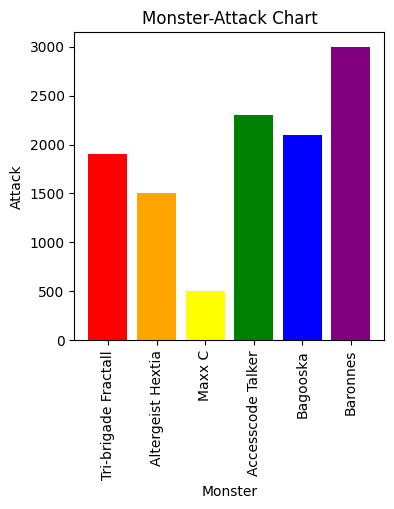

In [58]:
plt.figure(figsize=(4, 4))
plt.bar(df.name, df.attack, color = ["red", "orange", "yellow", "green", "blue", "purple"])
plt.xticks(df.name, rotation=90)
plt.xlabel("Monster")
plt.ylabel("Attack")
plt.title("Monster-Attack Chart")
plt.show()